In [1]:
"""examples in using the network module"""

'examples in using the network module'

In [2]:
%load_ext autoreload
%autoreload 2

# adding parent directory to import path
# otherwise simply place the 'network' folder in the same directory
import sys
import os
parent = os.path.dirname(os.path.abspath(''))
sys.path.append(parent)


import network

import gc
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
### MNIST classification
# please place the dataset manually inside this folder

# load
train = pd.read_csv("mnist_train.csv", header=None)
test = pd.read_csv("mnist_test.csv", header=None)

# preprocess X
X   = train.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01
X_t = test.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01

# one hot encode y
y   = np.eye(10)[train.iloc[:,0].to_numpy((int))]
y_t = np.eye(10)[test.iloc[:,0].to_numpy((int))]
y_true = np.argmax(y_t, axis=1)

del test, train

In [4]:
# define network
nn = network.NeuralNetwork([
                    network.Linear_layer(784, 200, bias=None),
                    network.Activation_layer('ReLU'),
    
                    network.Linear_layer(200, 10, bias=None),
                    network.Activation_layer('fast_softmax')
                    ])
param = {"lr": 1e-3, 'batch': 16, "mode": "train", "eps": 1e-9, "beta":(0.9, 0.999), 
         "epoch": 0, 'optimizer': 'Adam', 't': 1, 'clip': 1.0, 'decay': 0.0}

In [8]:
for i in range(5):
    nn.train(X, y, param, rand=True, loss_func='fast_cross_entropy')
    yhat = nn.query(X_t)
    accuracy = accuracy_score(y_true, yhat) * 100
    print(f"Epoch {i}, Performance = {accuracy}")
    param['lr'] *= 0.9
gc.collect()

Average loss = 1.472500, elapsed time = 62.77284812927246.
Epoch 0, Performance = 96.97
Average loss = 0.945809, elapsed time = 65.28380990028381.
Epoch 1, Performance = 97.5
Average loss = 0.660676, elapsed time = 62.038026094436646.
Epoch 2, Performance = 97.76
Average loss = 0.450164, elapsed time = 65.31541228294373.
Epoch 3, Performance = 98.25
Average loss = 0.346946, elapsed time = 69.12091588973999.
Epoch 4, Performance = 98.04


0

In [9]:
nn.print_parameters()

--0--
Printing linear layer:
{'bias': None,
 'input': array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]], dtype=float32),
 'input_nodes': 784,
 'm1': array([[ 2.64754004e-06, -3.06991847e-05, -1.20513298e-06, ...,
        -5.99672670e-06, -1.40701484e-05,  8.93790004e-06],
       [ 2.64754004e-06, -3.06991847e-05, -1.20513298e-06, ...,
        -5.99672670e-06, -1.40701484e-05,  8.93790004e-06],
       [ 2.64754004e-06, -3.06991847e-05, -1.20513298e-06, ...,
        -5.99672670e-06, -1.40701484e-05,  8.93790004e-06],
       ...,
       [ 2.64754004e-06, -3.06991847e-05, -1.20513298e-06, ...,
        -5.99672670e-06, -1.40701484e-05,  8.93790004e-06],
       [ 2.64754004e-06, -3.06991847e-05, -1.20513298e-06, ...,
        -5.996726

In [78]:
### Regression

x1 = np.arange(1,100)
x2 = np.arange(1,100)+1
x3 = np.stack((x1,x2)).T

x4 = x1*x2/99+x1
x4 = np.expand_dims(x4,axis=1)

In [82]:
# Maxout layer is a good choice for regression tasks thanks to its high complexity
nn2 = network.NeuralNetwork([
                    network.Maxout_layer(2, 20),
                    network.Maxout_layer(20, 1)
                    ])
param = {"lr": 1e-3, 'batch': 16, "mode": "train", "eps": 1e-9, "beta":(0.9, 0.999), 
         "epoch": 0, 'optimizer': 'Adam', 't': 1, 'clip': 1.0, 'decay': 0.0}

In [83]:
temp = nn2.layers[0].w1

In [84]:
for _ in range(1000):
    nn2.train(x3, x4, param)

Average loss = 7642.144229, elapsed time = 0.00.
Average loss = 5980.146477, elapsed time = 0.00.
Average loss = 4441.300479, elapsed time = 0.00.
Average loss = 3210.628255, elapsed time = 0.00.
Average loss = 2131.945491, elapsed time = 0.00.
Average loss = 1253.678404, elapsed time = 0.00.
Average loss = 637.506689, elapsed time = 0.00.
Average loss = 285.217652, elapsed time = 0.00.
Average loss = 124.771568, elapsed time = 0.00.
Average loss = 125.252491, elapsed time = 0.00.
Average loss = 139.949232, elapsed time = 0.00.
Average loss = 127.075600, elapsed time = 0.00.
Average loss = 110.949440, elapsed time = 0.00.
Average loss = 115.324265, elapsed time = 0.00.
Average loss = 113.076781, elapsed time = 0.00.
Average loss = 104.949029, elapsed time = 0.00.
Average loss = 103.190467, elapsed time = 0.00.
Average loss = 103.215698, elapsed time = 0.00.
Average loss = 103.067430, elapsed time = 0.00.
Average loss = 101.852146, elapsed time = 0.00.
Average loss = 101.486223, elapsed

In [85]:
print(f"{param['epoch']} epoch trained, error:")

# errors
nn2(x3) - x4

1000 epoch trained, error:


array([[ 3.53298975e-02],
       [-2.97551149e-02],
       [-3.77337468e-01],
       [-2.48437852e-01],
       [-1.39740257e-01],
       [-5.12446816e-02],
       [ 1.70488734e-02],
       [ 6.51404082e-02],
       [ 9.30299228e-02],
       [ 1.00717417e-01],
       [ 8.82028914e-02],
       [ 5.54863454e-02],
       [ 2.56777920e-03],
       [ 1.34178366e-02],
       [ 4.72521259e-02],
       [ 6.08843949e-02],
       [ 5.43146437e-02],
       [ 8.75760723e-02],
       [ 1.43210424e-01],
       [ 1.78642755e-01],
       [ 1.93873067e-01],
       [ 1.88901358e-01],
       [ 1.63727628e-01],
       [ 1.18351879e-01],
       [ 5.27741094e-02],
       [-3.30056804e-02],
       [-1.38987490e-01],
       [-1.31107472e-01],
       [ 2.53625874e-02],
       [ 1.61630627e-01],
       [ 2.77696646e-01],
       [ 3.73560645e-01],
       [ 4.49222623e-01],
       [ 5.04682582e-01],
       [ 5.39940520e-01],
       [ 5.54996438e-01],
       [ 5.49850336e-01],
       [ 5.24502214e-01],
       [ 4.7

In [86]:
# this is the total weight updates our 1st layer received

# Maxout also suffers from the dying ReLU problem,
# Zeros below represent dead nodes
temp - nn2.layers[0].w1

array([[-0.04924034,  0.48018751,  0.        , -0.39799386, -0.03795202,
         0.05978672,  0.0584914 ,  0.        ,  0.        , -0.0323024 ,
        -0.13698917,  0.        , -0.3150795 ,  0.05288139, -0.04772047,
         0.        ,  0.        , -0.28442626,  0.09078936,  0.08620829],
       [-0.10634606,  0.48022264,  0.        , -0.46703378, -0.08969051,
         0.11630773,  0.05823804,  0.        ,  0.        , -0.08409347,
        -0.10503049,  0.        , -0.29095998, -0.01104851, -0.10373243,
         0.        ,  0.        , -0.32580822,  0.15104747,  0.14917905],
       [-3.09806207,  0.48018751,  0.        , -0.95327375, -2.79120357,
         3.05824615,  0.0398619 ,  0.        ,  0.        , -2.79026658,
        -0.04191182,  0.        , -0.2918677 , -0.48978952, -3.04822581,
         0.        ,  0.        , -0.38091249,  3.25301521,  3.35398112]])

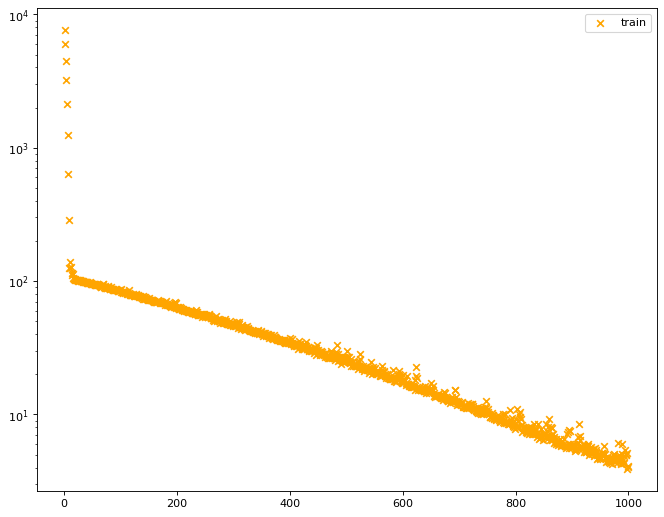

In [87]:
nn2.plot_loss()

In [23]:
# conv1d

In [130]:
X = np.arange(100).reshape(25, 1, 4)
y = np.sum(X, axis=2)

In [135]:
nn = network.NeuralNetwork([
                            network.Conv1d_layer(1, 4, 4, 2),
                            network.Activation_layer('ReLU'),
                            network.Conv1d_layer(4, 1, 3, 2),
                            network.Activation_layer('ReLU'),
                            network.Flatten_layer(),
                            network.Linear_layer(2, 1)
                            ])
param = {"lr": 3e-4, 'batch': 8, "mode": "train", "eps": 1e-9, "beta":(0.9, 0.999), 
         "epoch": 0, 'optimizer': 'Adam', 't': 1, 'clip': 1.0, 'decay': 0.0}

In [136]:
nn.print_parameters()

--0--
Printing conv1d layer:
{'bias': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
 'db1': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
 'db2': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
 'ic': 1,
 'iw': 4,
 'kernels': array([[[-1.22636952, -0.39171281]],

       [[ 0.2213431 ,  0.29404109]],

       [[ 1.92317147,  0.00341989]],

       [[ 0.83293091,  0.67845352]]]),
 'kw': 2,
 'm1': array([[[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]]]),
 'm2': array([[[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]]]),
 'oc': 4,
 'ow': 3,
 'stride': 1,
 'type': 'conv1d'}
--1--
Printing activation layer:
{'func_backward': <function <lambda> at 0x00000245491535E0>,
 'func_forward': <function <lambda> at 0x0000024549153550>,
 'func_name': 'relu',
 'type': 'activation'}
--2--
Printing conv1d layer:
{'bias': array([[0., 0.]]),
 'db1': 

In [139]:
for _ in range(1000):
    nn.train(X, y, param, loss_func='mse')

Average loss = 5429.251989, elapsed time = 0.01.
Average loss = 5346.549096, elapsed time = 0.01.
Average loss = 5166.223970, elapsed time = 0.01.
Average loss = 4969.330638, elapsed time = 0.01.
Average loss = 4849.931464, elapsed time = 0.01.
Average loss = 4567.026620, elapsed time = 0.01.
Average loss = 4455.537694, elapsed time = 0.01.
Average loss = 4297.797639, elapsed time = 0.01.
Average loss = 4069.375476, elapsed time = 0.01.
Average loss = 3908.699554, elapsed time = 0.01.
Average loss = 3840.811372, elapsed time = 0.01.
Average loss = 3601.283213, elapsed time = 0.01.
Average loss = 3435.946129, elapsed time = 0.01.
Average loss = 3259.933498, elapsed time = 0.00.
Average loss = 3155.309412, elapsed time = 0.01.
Average loss = 2964.623221, elapsed time = 0.01.
Average loss = 2820.968023, elapsed time = 0.01.
Average loss = 2709.041955, elapsed time = 0.00.
Average loss = 2587.124326, elapsed time = 0.01.
Average loss = 2465.253453, elapsed time = 0.01.
Average loss = 2306.

In [128]:
nn.print_parameters()

--0--
Printing conv1d layer:
{'bias': array([[-0.34813533,  0.51938364,  0.48534873],
       [-0.07292807, -0.07453843, -0.07535068],
       [-0.07099089,  0.0509452 , -0.06752241],
       [-0.13560431,  0.        ,  0.        ]]),
 'db1': array([[ 1.53798469e-004, -2.65966630e-004, -1.50187029e-003],
       [ 3.18693958e-004,  2.55116629e-004,  2.33672458e-004],
       [ 3.42536769e-004, -1.84598765e-004,  8.54755118e-004],
       [ 1.38708291e-110,  0.00000000e+000,  0.00000000e+000]]),
 'db2': array([[1.88205564e-03, 5.49477048e-03, 3.25412363e-02],
       [2.04991451e-02, 1.27635813e-02, 1.05399497e-02],
       [2.43721704e-02, 9.00209717e-03, 1.58779124e-01],
       [1.42755790e-07, 0.00000000e+00, 0.00000000e+00]]),
 'ic': 1,
 'inputs': array([[[76, 77, 78, 79]],

       [[40, 41, 42, 43]],

       [[84, 85, 86, 87]],

       [[12, 13, 14, 15]],

       [[24, 25, 26, 27]],

       [[64, 65, 66, 67]],

       [[60, 61, 62, 63]],

       [[28, 29, 30, 31]]]),
 'iw': 4,
 'kernels': 

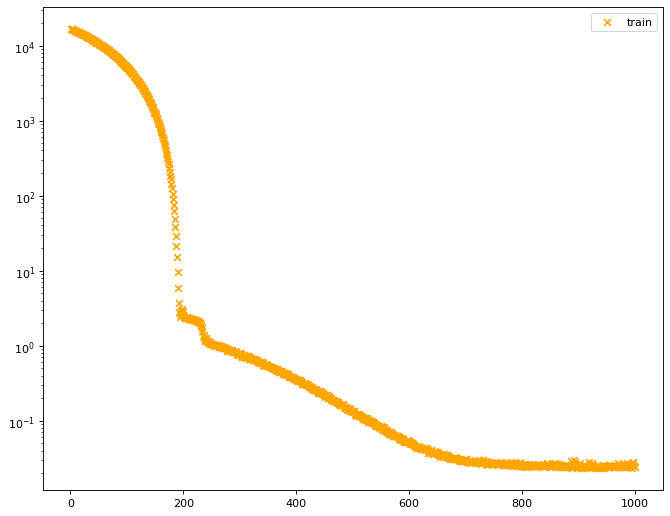

In [129]:
nn.plot_loss()